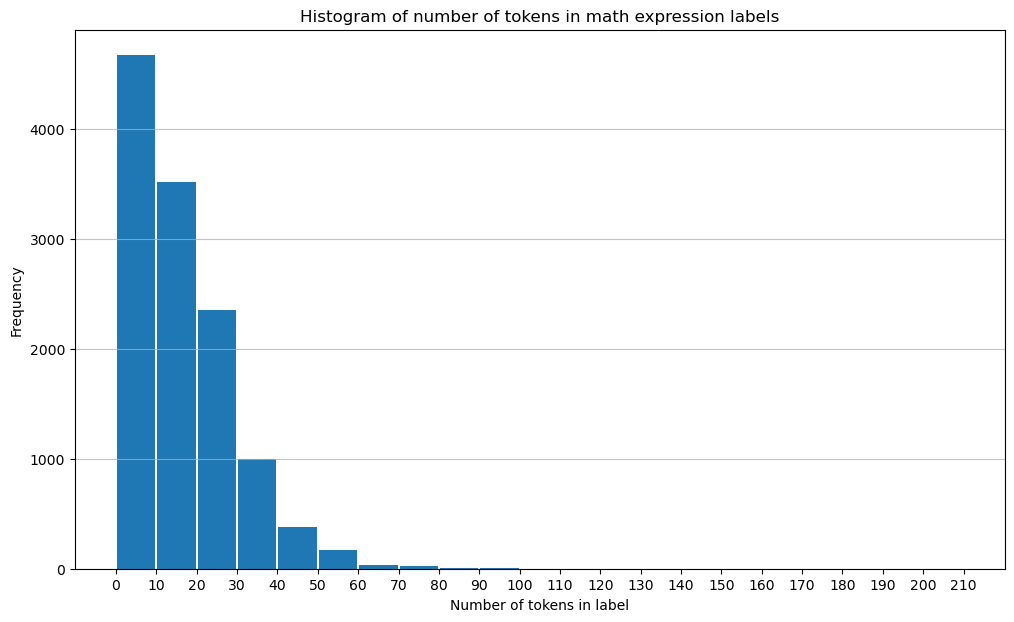

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

def analyze(folder_paths):
    all_data = []
    for folder_path in folder_paths:
        for root, _, files in os.walk(folder_path):
            for file in files:
                if file.endswith('.txt'):
                    file_path = os.path.join(root, file)
                    try:
                        df = pd.read_csv(file_path, sep='\t', header=None, names=['filename', 'label'])
                        all_data.append(df)
                    except Exception as e:
                        print(f'Error reading file {file_path}: {e}')

    merged_df = pd.concat(all_data, ignore_index=True)
    merged_df['token_count'] = merged_df['label'].str.split().str.len()


    max_tokens = merged_df['token_count'].max()
    bins = np.arange(0, max_tokens + 10, 10)

    plt.figure(figsize=(12, 7))
    plt.hist(merged_df['token_count'], bins=bins, rwidth=0.95)
    plt.xlabel('Number of tokens in label')
    plt.ylabel('Frequency')
    plt.title('Histogram of number of tokens in math expression labels')
    plt.xticks(bins)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

    return merged_df

folder_path = ['../resources/CROHME_eda/train']
combined_dataframe = analyze(folder_path)

In [2]:
combined_dataframe

,filename,label,token_count
0,formulaire026-equation052,"( y , s - 1 )",7
1,RIT_2014_282,\frac { 3 x } { 3 } + \frac { 1 } { 3 } = \fra...,24
2,UN19wb_1121_em_1189,- 4 ( \gamma + \log 4 ) + b + \frac { 4 B \pi ...,36
3,2009220-1327-107,3 7 . 0,4
4,UN_106_em_132,\frac { 1 } { 4 } \sqrt { ( a + b + c ) ( a + ...,38
...,...,...,...
12161,200924-1312-4,V _ { V },5
12162,formulaire031-equation031,a _ { 6 } x ^ { 6 } + a _ { 5 } x ^ { 5 } + a ...,69
12163,512_em_282,\sqrt [ 3 ] { x ^ { 2 } },11
12164,UN_466_em_985,1 6 \times 2 \times 2 - ( 1 6 + 1 6 \times 2 )...,19


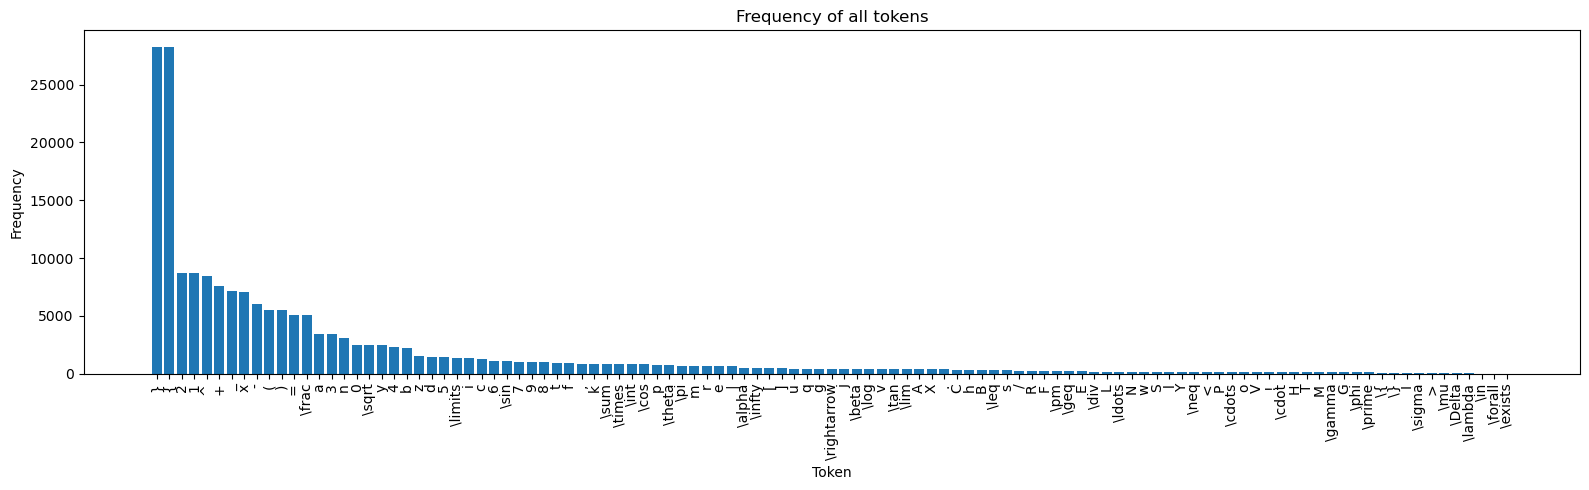

,token,frequency
0,},28276
1,{,28276
2,2,8743
3,1,8743
4,^,8498
...,...,...
104,\Delta,51
105,\lambda,43
106,\in,24
107,\forall,16


In [3]:
def analyze_token_frequencies(combined_df, top_n=150):

    all_labels_text = ' '.join(combined_df['label'].astype(str).tolist())
    tokens = all_labels_text.split()
    token_counts = Counter(tokens)

    token_frequency_df = pd.DataFrame(token_counts.items(), columns=['token', 'frequency'])
    token_frequency_df = token_frequency_df.sort_values(by='frequency', ascending=False).reset_index(drop=True)

    top_n_tokens_df = token_frequency_df.head(top_n)
    tokens_to_plot = top_n_tokens_df['token'].tolist()
    counts_to_plot = top_n_tokens_df['frequency'].tolist()

    plt.figure(figsize=(16, 5))
    plt.bar(tokens_to_plot, counts_to_plot)
    plt.xlabel("Token")
    plt.ylabel("Frequency")
    if top_n >= len(token_counts):
        plt.title(f"Frequency of all tokens")
    else:
        plt.title(f"Frequency of top {top_n} tokens")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    return token_frequency_df

tokens_df = analyze_token_frequencies(combined_dataframe)
tokens_df

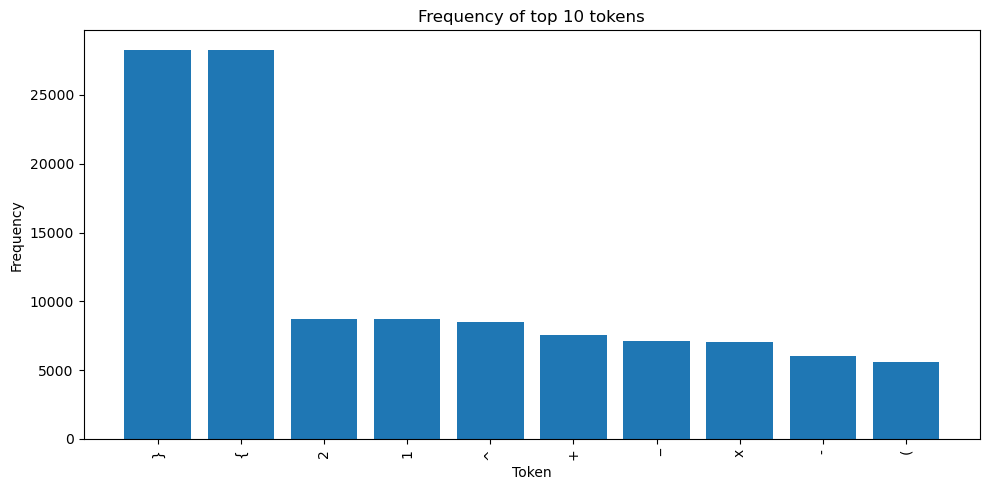

In [4]:
def analyze_token_frequencies(combined_df, top_n=150):

    all_labels_text = ' '.join(combined_df['label'].astype(str).tolist())
    tokens = all_labels_text.split()
    token_counts = Counter(tokens)

    token_frequency_df = pd.DataFrame(token_counts.items(), columns=['token', 'frequency'])
    token_frequency_df = token_frequency_df.sort_values(by='frequency', ascending=False).reset_index(drop=True)

    top_n_tokens_df = token_frequency_df.head(top_n)
    tokens_to_plot = top_n_tokens_df['token'].tolist()
    counts_to_plot = top_n_tokens_df['frequency'].tolist()

    plt.figure(figsize=(10, 5))
    plt.bar(tokens_to_plot, counts_to_plot)
    plt.xlabel("Token")
    plt.ylabel("Frequency")
    if top_n >= len(token_counts):
        plt.title(f"Frequency of all tokens")
    else:
        plt.title(f"Frequency of top {top_n} tokens")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    return token_frequency_df

_ = analyze_token_frequencies(combined_dataframe, top_n=10)